In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data for convolutional input
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: ', accuracy)




11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 72ms/step - accuracy: 0.6767 - loss: 0.9400 - val_accuracy: 0.9712 - val_loss: 0.1009
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9609 - loss: 0.1590 - val_accuracy: 0.9822 - val_loss: 0.0689
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 65ms/step - accuracy: 0.9733 - loss: 0.1095 - val_accuracy: 0.9831 - val_loss: 0.0591
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step - accuracy: 0.9792 - loss: 0.0849 - val_accuracy: 0.9777 - val_loss: 0.0785
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 67ms/step - accuracy: 0.9834 - loss: 0.0650 - val_accuracy: 0.9861 - val_loss: 0.0573
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9863 - loss: 0.0549 - val_accuracy: 0.9857 - val_loss: 0.0614
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9868 - loss: 0.0557 - val_accuracy: 0.9859 - val_loss: 0.0648
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 64s 69ms/step - accuracy: 0.9885 - loss: 0.0467 - 

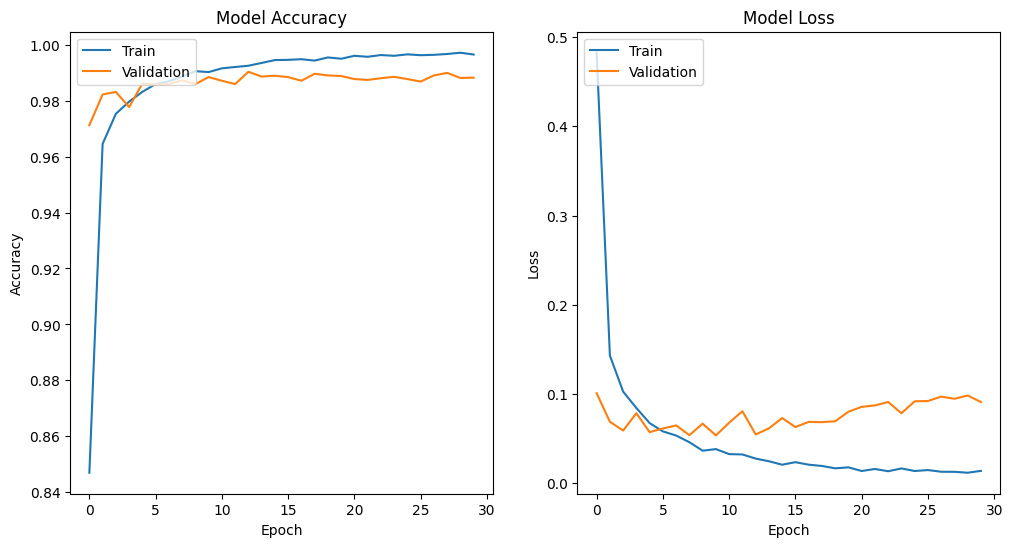

In [3]:
import matplotlib.pyplot as plt
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

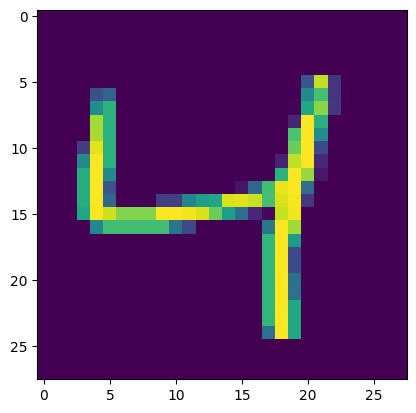

In [4]:
plt.imshow(x_train[2])

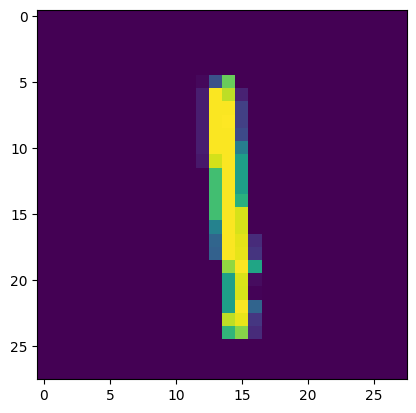

In [6]:
plt.imshow(x_train[8])

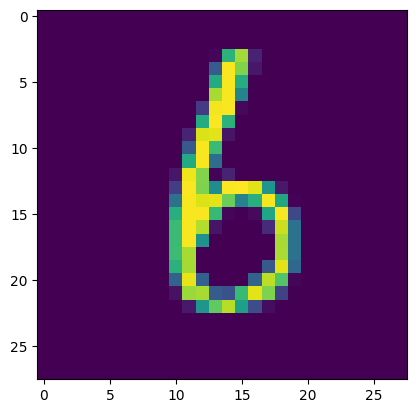

In [7]:
plt.imshow(x_train[660])

In [8]:
from sklearn.metrics import accuracy_score
import numpy as np

Enter an image index (between 0 and 9999) to predict: 7


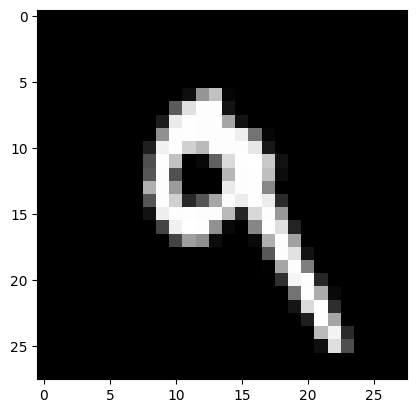

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
The predicted digit is: 9
Accuracy of the predicted input: 100.00%


In [9]:
# Function to predict user input
def predict_digit(img):
    img = img.reshape(1, 28, 28, 1)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    return predicted_digit

# Get user input
user_input = input("Enter an image index (between 0 and 9999) to predict: ")
try:
    index = int(user_input)
    if index >= 0 and index < 10000:
        sample_image = x_test[index]
        sample_label = y_test[index]
        plt.imshow(sample_image.reshape(28, 28), cmap='gray')
        plt.show()
        predicted_digit = predict_digit(sample_image)
        print(f"The predicted digit is: {predicted_digit}")

        # Calculate the accuracy of the predicted input
        accuracy = accuracy_score([sample_label], [predicted_digit])
        print(f"Accuracy of the predicted input: {accuracy*100:.2f}%")
    else:
        print("Invalid index. Please enter a value between 0 and 9999.")
except ValueError:
    print("Invalid input. Please enter a number.")

In [10]:
x_train[5]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [11]:
# Function to preprocess the input image
from tensorflow.keras.preprocessing import image



In [12]:
def preprocess_image(image_path):
    img = image.load_img(image_path, color_mode="grayscale", target_size=(28, 28))
    img = image.img_to_array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img



# Function to predict the digit in the input image
def predict_digit(image_path):
    img = preprocess_image(image_path)
    prediction = model.predict(img)
    predicted_digit = np.argmax(prediction)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted Digit: {predicted_digit}')
    plt.axis('off')
    plt.show()
    return predicted_digit




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


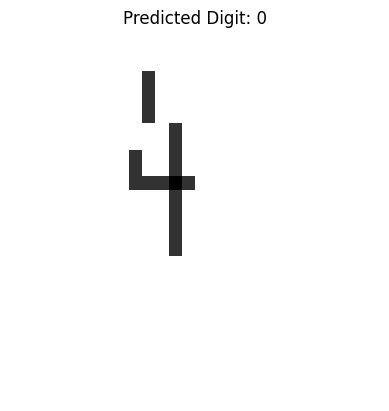

np.int64(0)

In [14]:
from google.colab import files
# Then use the filename from uploaded.keys()
predict_digit('Capture.png')  # if that's the uploaded file

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


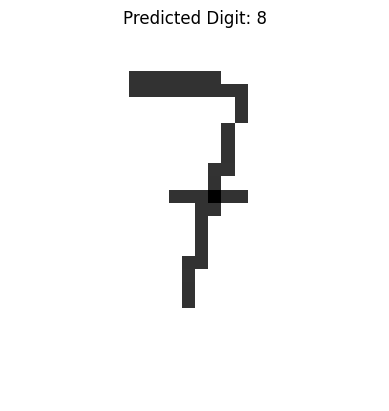

np.int64(8)

In [15]:
from google.colab import files
# Then use the filename from uploaded.keys()
predict_digit('Capture2.png')  # if that's the uploaded file